![alt text](path_to_banner_image.jpg)
# Predicting Student Success with Machine Learning
Author: Elijah Lopez



Realinho, V., Vieira Martins, M., Machado, J., & Baptista, L. (2021). Predict Students' Dropout and Academic Success [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5MC89.
from https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

## Overview


## Business Problem


## Data


### Summary of Data Findings


## Potential Routes of Analysis


## Chosen Metrics for Analysis


## Data Cleaning & Feature Engineering

## Analysis

### Direction 1


#### Direction 1 Statistical Testing
Rationale for test selection
H0:
H1:

Recommendation 1:

### Direction 2


#### Direction 2 Statistical Testing
Rationale for test selection
H0:
H1:

Recommendation 2:

### Direction 3

#### Direction 3 Statistical Testing
Rationale for test selection
H0:
H1:

Recommendation 3:

## Results


### Direction 1
* 


### Direction 2
* 


### Direction 3
* 

## Conclusions
This analysis leads to three recommendations.

1. 

2. 

3. 

## Next Steps
* 

In [23]:
# Standard Data Science/Analysis Toolkit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.style.use("ggplot")
import seaborn as sns

from scipy.stats import f_oneway

# Machine Learning Tools, Utilities, and Scoring Metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score, RepeatedKFold, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, mean_squared_error, r2_score, explained_variance_score


# Suite of Machine Learning Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from xgboost import XGBRegressor


# Setup to Ignore Version Errors and Deprecations
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)

df = pd.read_csv('data.csv', sep=';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

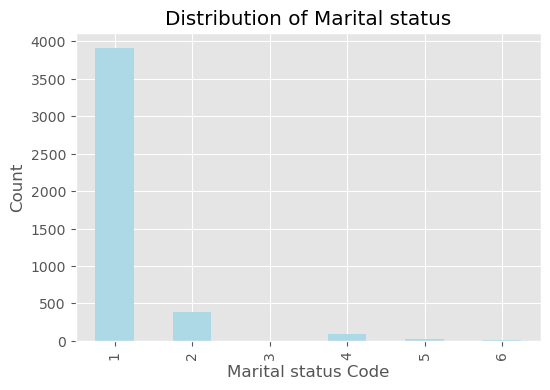

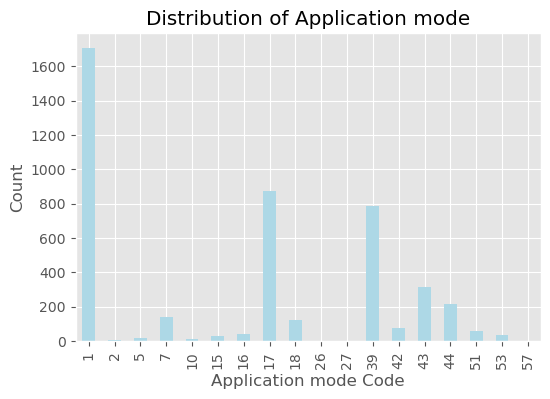

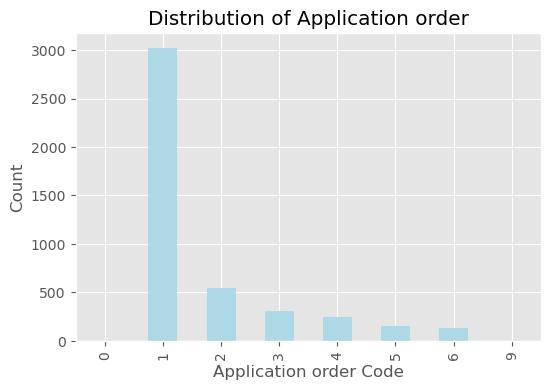

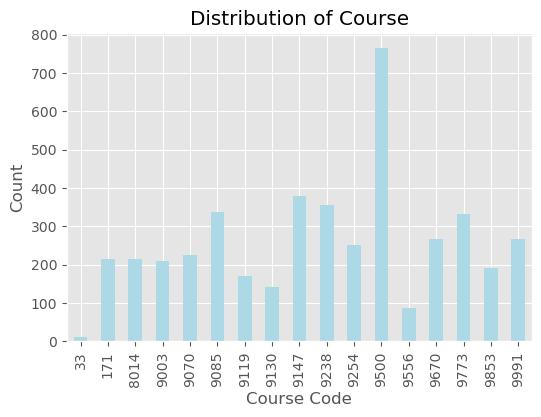

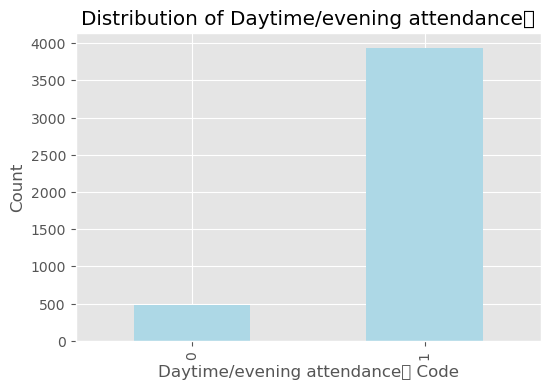

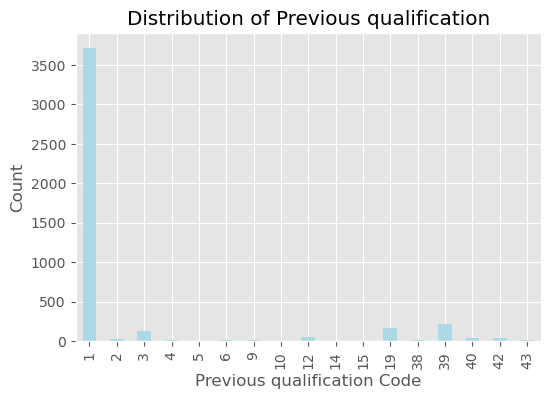

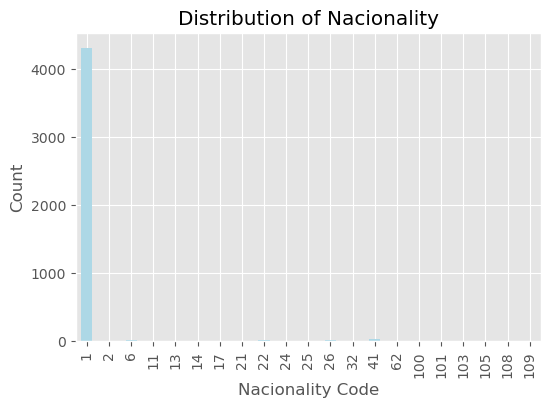

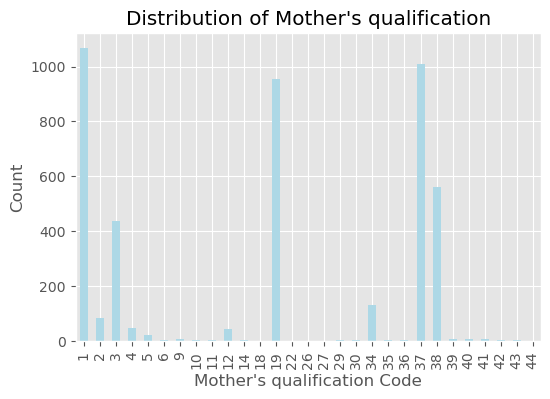

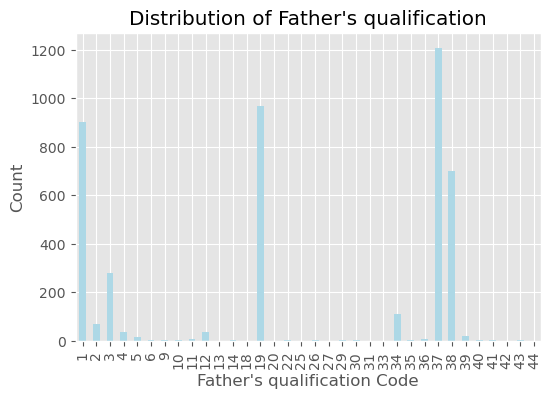

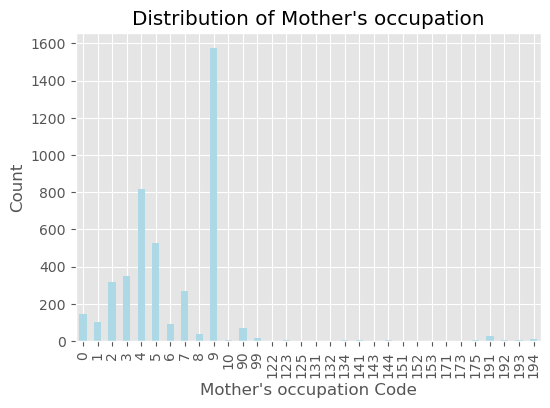

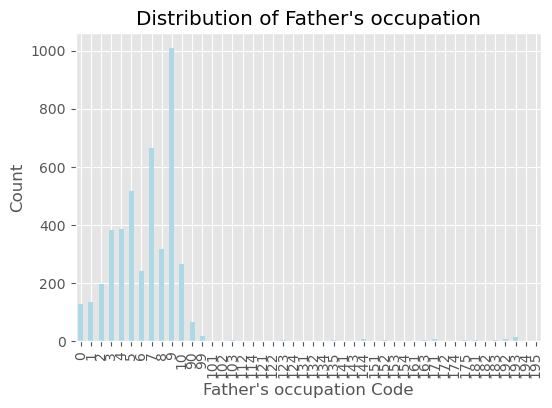

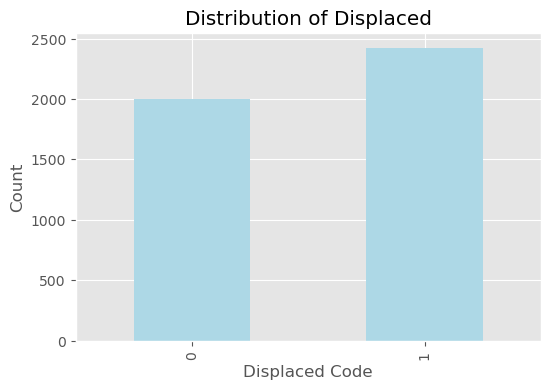

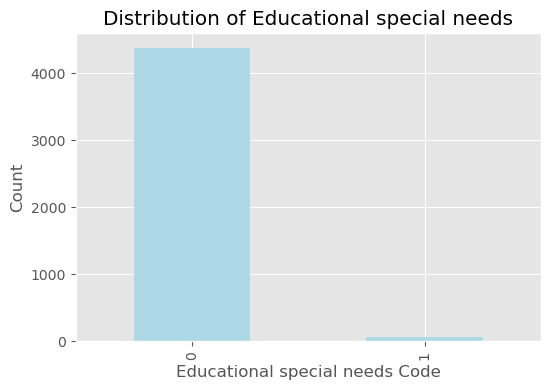

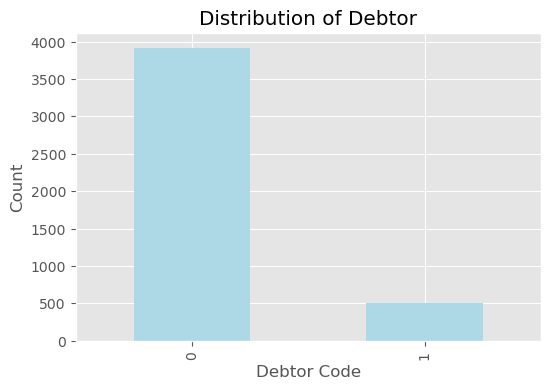

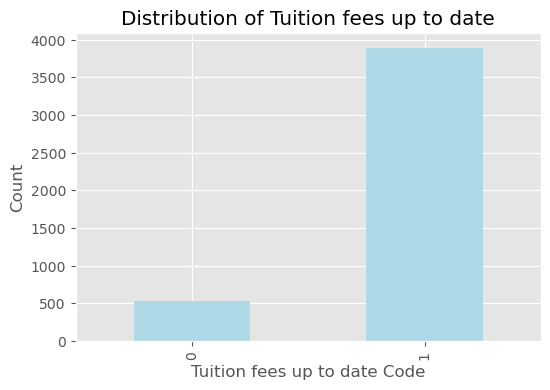

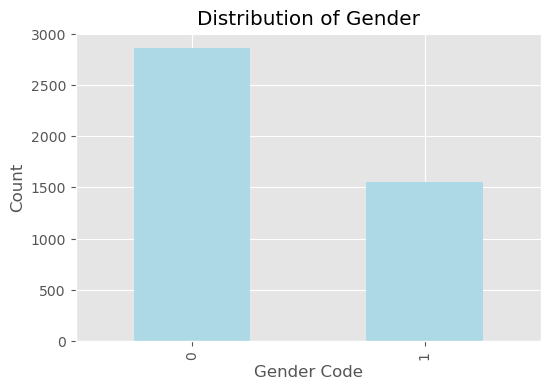

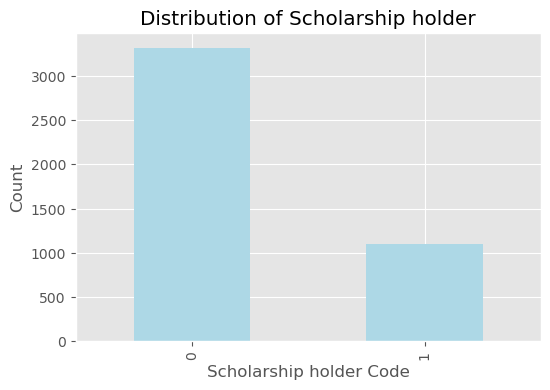

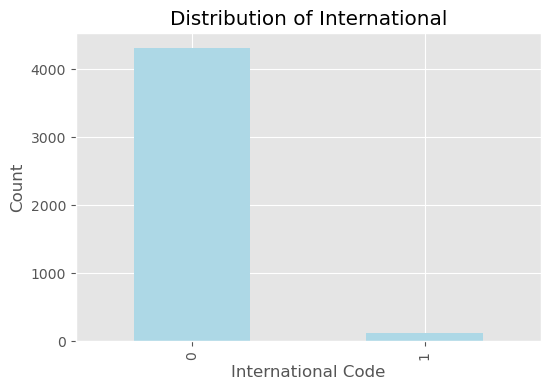

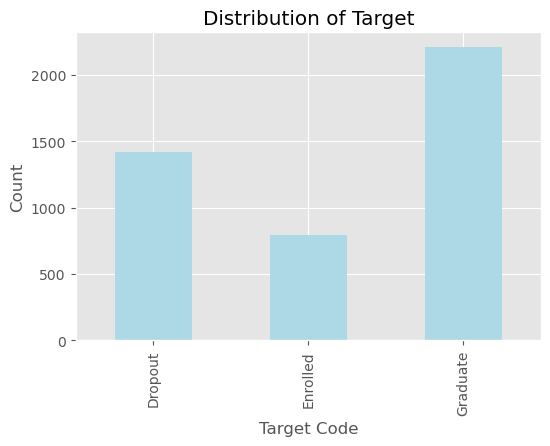

In [4]:
cat_cols = [
    "Marital status",
    "Application mode",
    "Application order",
    "Course",
    "Daytime/evening attendance\t",
    "Previous qualification",
    
    "Nacionality",
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    
    "Displaced",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Gender",
    "Scholarship holder",
    
    "International",
    
    "Target"
    ]

for column in cat_cols:
    plt.figure(figsize=(6, 4))
    df[column].value_counts().sort_index().plot(kind='bar', color='lightblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(f'{column} Code')
    plt.ylabel('Count')
    plt.show()

In [5]:
num_cols = [
    'Previous qualification (grade)',
    "Admission grade",
    "Age at enrollment",
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)",
    "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (grade)",
    "Curricular units 2nd sem (without evaluations)",
    "Unemployment rate",
    "Inflation rate",
    "GDP"
    ]

In [6]:
# sns.pairplot(df[num_cols + ['Target']], hue='Target', palette='Set1', diag_kind='hist')

                                                Previous qualification (grade)  \
Previous qualification (grade)                                        1.000000   
Admission grade                                                       0.580444   
Age at enrollment                                                    -0.111377   
Curricular units 1st sem (credited)                                  -0.008872   
Curricular units 1st sem (enrolled)                                  -0.029169   
Curricular units 1st sem (evaluations)                               -0.070702   
Curricular units 1st sem (approved)                                   0.048410   
Curricular units 1st sem (grade)                                      0.059438   
Curricular units 1st sem (without evaluations)                       -0.003926   
Curricular units 2nd sem (credited)                                  -0.018489   
Curricular units 2nd sem (enrolled)                                  -0.031649   
Curricular units

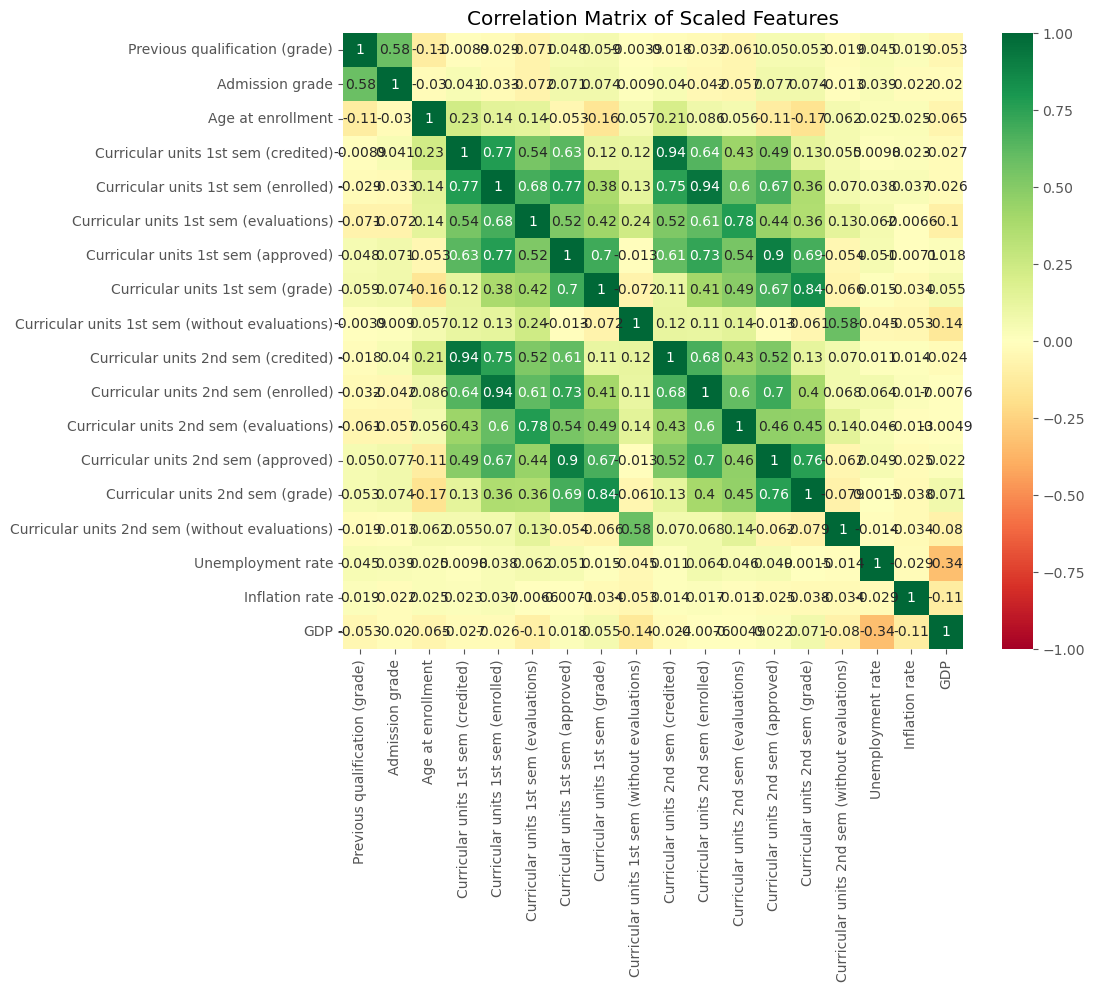

In [8]:
correlation_matrix = df.drop(columns=cat_cols, axis=1).corr()

# Print correlation matrix
print(correlation_matrix)

# Optional: Plotting the correlation matrix for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Scaled Features")
plt.show()

In [12]:
num_df = df[num_cols].copy()
num_df['Target'] = df['Target']
num_df.head()

,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,122.0,127.3,20,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,160.0,142.5,19,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,122.0,124.8,19,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,122.0,119.6,20,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,100.0,141.5,45,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [13]:
# creating function to reset scores for model performance tests for different X_train variations
def reset_model_scores(models):
  for name in models:
    models[name]["All_Scores"] = list()
    models[name]["Top_Score"] = float()
    models[name]["Mean_Score"] = float()
    models[name]["Std_Score"] = float()

  return models

In [14]:
def test_models_performance(models, x_train, y_train, isRegressor, num_folds = 10):

  # reset the performance scores first using function above
  reset_model_scores(models)

  # set scoring type based on model type
  scoring = "neg_mean_squared_error" if isRegressor else "accuracy"

  # get the performance scores for each model and add them to the
  # corresponding result list
  for name in models:

    folds = KFold(n_splits=num_folds) if isRegressor else StratifiedKFold(n_splits=num_folds)

    results = cross_val_score(estimator=models[name]["Estimator"],
                              X=x_train,
                              y=y_train,
                              cv=folds,
                              scoring=scoring)
    models[name]["Top_Score"] = results.max()
    models[name]["Mean_Score"] = results.mean()
    models[name]["Std_Score"] = results.std()

    for result in results:
      models[name]["All_Scores"].append(result)

  # print the results
  for name in models:
    print("\n[MODEL TYPE: {}]\n".format(name))
    print(">>>> Top Performance: \t\t{:.4f}".format(models[name]["Top_Score"]))
    print(">>>> Average Performance: \t{:.4f}".format(models[name]["Mean_Score"]))
    print(">>>> Spread of Performance: \t{:.4f}".format(models[name]["Std_Score"]))

In [15]:
# printing accuracy scores
def print_accuracy(y_test, y_pred, isRegressor):

  if isRegressor:
    accuracy = 100 * explained_variance_score(y_test, y_pred)
  else:
    accuracy = 100 * accuracy_score(y_true=y_test,
                                y_pred=y_pred)

  print("> ACCURACY: \t{:.2f}%".format(accuracy))

In [17]:
# Identify the target feature and isolate it to produce X and y data segments
TARGET = 'Target'
X, y = num_df.drop(columns=TARGET), num_df[TARGET]

In [18]:
# Split X and Y into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=42)

In [19]:
# fit the X_train
# transform X_test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# now we'll use the minmax scaler
mm_scaler = MinMaxScaler()
X_train_mm_scaled = mm_scaler.fit_transform(X_train)
X_test_mm_scaled = mm_scaler.transform(X_test)

In [28]:
# creating models that we want to test to see which is most optimized
# we will use this to test different X_train variations
models = {
    "LOGREG": {
        "Estimator": LogisticRegression(),
    },

    "DECISION TREE": {
        "Estimator": DecisionTreeClassifier(),
    },

    "KNN": {
        "Estimator": KNeighborsClassifier(),
    },
    "SVM": {
        "Estimator": SVC(),
    },
    "Bayes": {
        "Estimator": GaussianNB(),
    },
}

In [30]:
# Function to reset model scores
def reset_model_scores(models):
    for name in models:
        models[name]["All_Scores"] = list()
        models[name]["Top_Score"] = float()
        models[name]["Mean_Score"] = float()
        models[name]["Std_Score"] = float()

    return models

# Modified performance testing function for classification
def test_models_performance(models, x_train, y_train, isClassifier=True, num_folds=10):
    reset_model_scores(models)

    # Use appropriate scoring metric based on whether it's a classification or regression task
    scoring = "accuracy" if isClassifier else "neg_mean_squared_error"

    # Get the performance scores for each model and add them to the corresponding result list
    for name in models:
        folds = StratifiedKFold(n_splits=num_folds)  # StratifiedKFold for classification
        results = cross_val_score(estimator=models[name]["Estimator"],
                                  X=x_train,
                                  y=y_train,
                                  cv=folds,
                                  scoring=scoring)
        models[name]["Top_Score"] = results.max()
        models[name]["Mean_Score"] = results.mean()
        models[name]["Std_Score"] = results.std()

        for result in results:
            models[name]["All_Scores"].append(result)

    # Print the results
    for name in models:
        print("\n[MODEL TYPE: {}]\n".format(name))
        print(">>>> Top Performance: \t\t{:.4f}".format(models[name]["Top_Score"]))
        print(">>>> Average Performance: \t{:.4f}".format(models[name]["Mean_Score"]))
        print(">>>> Spread of Performance: \t{:.4f}".format(models[name]["Std_Score"]))


In [31]:
from sklearn.metrics import classification_report

# Modify the accuracy printing function for classification
def print_accuracy(y_test, y_pred, isClassifier=True):
    if isClassifier:
        # Print classification metrics like accuracy, precision, recall, F1-score
        print("> ACCURACY: \t{:.2f}%".format(100 * accuracy_score(y_test, y_pred)))
        print("> Classification Report: ")
        print(classification_report(y_test, y_pred))

    else:
        # Regression output
        accuracy = 100 * explained_variance_score(y_test, y_pred)
        print("> ACCURACY: \t{:.2f}%".format(accuracy))


In [32]:
# Test the models with classification task
test_models_performance(models, X_train, y_train, isClassifier=True)

# Print the classification accuracy for the best model (e.g., using Logistic Regression here)
best_model = models["LOGREG"]["Estimator"]
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print_accuracy(y_test, y_pred, isClassifier=True)



[MODEL TYPE: LOGREG]

>>>> Top Performance: 		0.7564
>>>> Average Performance: 	0.7415
>>>> Spread of Performance: 	0.0126

[MODEL TYPE: DECISION TREE]

>>>> Top Performance: 		0.6949
>>>> Average Performance: 	0.6468
>>>> Spread of Performance: 	0.0325

[MODEL TYPE: KNN]

>>>> Top Performance: 		nan
>>>> Average Performance: 	nan
>>>> Spread of Performance: 	nan

[MODEL TYPE: SVM]

>>>> Top Performance: 		0.6836
>>>> Average Performance: 	0.6643
>>>> Spread of Performance: 	0.0131

[MODEL TYPE: Bayes]

>>>> Top Performance: 		0.7373
>>>> Average Performance: 	0.6852
>>>> Spread of Performance: 	0.0268
> ACCURACY: 	73.45%
> Classification Report: 
              precision    recall  f1-score   support

     Dropout       0.80      0.73      0.76       316
    Enrolled       0.44      0.24      0.31       151
    Graduate       0.75      0.92      0.82       418

    accuracy                           0.73       885
   macro avg       0.66      0.63      0.63       885
weighted avg     

In [35]:
# Test the models with classification task
test_models_performance(models, X_train, y_train, isClassifier=True)

# Print the classification accuracy for the best model (e.g., using Logistic Regression here)
best_model = models["LOGREG"]["Estimator"]
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test)
print_accuracy(y_test, y_pred, isClassifier=True)



[MODEL TYPE: LOGREG]

>>>> Top Performance: 		0.7564
>>>> Average Performance: 	0.7415
>>>> Spread of Performance: 	0.0126

[MODEL TYPE: DECISION TREE]

>>>> Top Performance: 		0.6921
>>>> Average Performance: 	0.6553
>>>> Spread of Performance: 	0.0272

[MODEL TYPE: KNN]

>>>> Top Performance: 		nan
>>>> Average Performance: 	nan
>>>> Spread of Performance: 	nan

[MODEL TYPE: SVM]

>>>> Top Performance: 		0.6836
>>>> Average Performance: 	0.6643
>>>> Spread of Performance: 	0.0131

[MODEL TYPE: Bayes]

>>>> Top Performance: 		0.7373
>>>> Average Performance: 	0.6852
>>>> Spread of Performance: 	0.0268
> ACCURACY: 	65.08%
> Classification Report: 
              precision    recall  f1-score   support

     Dropout       0.90      0.50      0.65       316
    Enrolled       0.00      0.00      0.00       151
    Graduate       0.59      1.00      0.74       418

    accuracy                           0.65       885
   macro avg       0.50      0.50      0.46       885
weighted avg     

In [36]:
# Test the models with classification task
test_models_performance(models, X_train, y_train, isClassifier=True)

# Print the classification accuracy for the best model (e.g., using Logistic Regression here)
best_model = models["LOGREG"]["Estimator"]
best_model.fit(X_train_mm_scaled, y_train)
y_pred = best_model.predict(X_test)
print_accuracy(y_test, y_pred, isClassifier=True)



[MODEL TYPE: LOGREG]

>>>> Top Performance: 		0.7564
>>>> Average Performance: 	0.7415
>>>> Spread of Performance: 	0.0126

[MODEL TYPE: DECISION TREE]

>>>> Top Performance: 		0.6921
>>>> Average Performance: 	0.6510
>>>> Spread of Performance: 	0.0288

[MODEL TYPE: KNN]

>>>> Top Performance: 		nan
>>>> Average Performance: 	nan
>>>> Spread of Performance: 	nan

[MODEL TYPE: SVM]

>>>> Top Performance: 		0.6836
>>>> Average Performance: 	0.6643
>>>> Spread of Performance: 	0.0131

[MODEL TYPE: Bayes]

>>>> Top Performance: 		0.7373
>>>> Average Performance: 	0.6852
>>>> Spread of Performance: 	0.0268
> ACCURACY: 	56.05%
> Classification Report: 
              precision    recall  f1-score   support

     Dropout       0.92      0.25      0.40       316
    Enrolled       0.00      0.00      0.00       151
    Graduate       0.52      1.00      0.68       418

    accuracy                           0.56       885
   macro avg       0.48      0.42      0.36       885
weighted avg     

In [37]:
print(y_train.value_counts())

Target
Graduate    1791
Dropout     1105
Enrolled     643
Name: count, dtype: int64


Logistic Regression shows promise with an average accuracy of 74.15%. Will look into model improvement

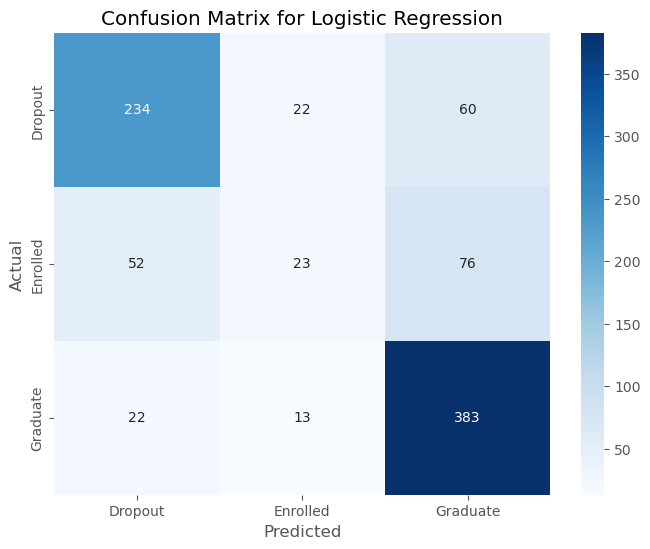

Confusion Matrix:
 [[234  22  60]
 [ 52  23  76]
 [ 22  13 383]]


In [40]:
# Fit the Logistic Regression model
model = LogisticRegression(max_iter=1000, multi_class='ovr')
model.fit(X_train_scaled, y_train)

# Predict the target values for X_test
y_pred = model.predict(X_test_scaled)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Optionally, print the confusion matrix as text
print("Confusion Matrix:\n", cm)